# Garbage recogintion

Using dataset from Kaggle https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification ,
use various deep learning models to compare the performance between them to create an application for Garbage recognition.

#### Models compared (Using TensorFlow)
- Own Neural network 
- Pretrained models
    - VGG19
    - Resnet50

#### Metrics used to compare
- Accuracy
- Loss



In [1]:

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

### Exploratory Analysis

There are 6 subfolders with images on
- Plastic
- Cupboard
- Metal
- Plastic
- Glass
- Trash


In [2]:
datapath = 'Garbage_recognition/Garbage classification/Garbage classification'

In [3]:
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()     
        plt.imshow(img)

/var/folders/sq/r22wpgjx4fl0jn162qxwjhq00000gn/T/ipykernel_4293/3433810448.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


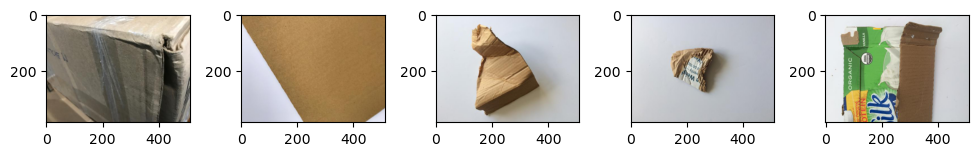

In [4]:
plot_imgs(datapath+'/cardboard')


/var/folders/sq/r22wpgjx4fl0jn162qxwjhq00000gn/T/ipykernel_4293/3433810448.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


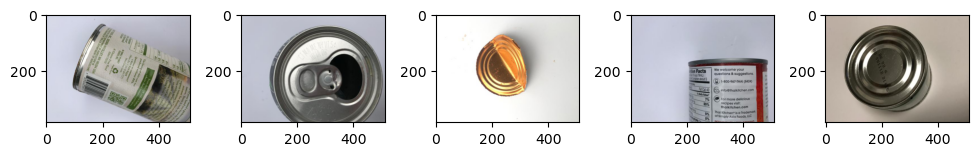

In [5]:
plot_imgs(datapath+'/metal')


/var/folders/sq/r22wpgjx4fl0jn162qxwjhq00000gn/T/ipykernel_4293/3433810448.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


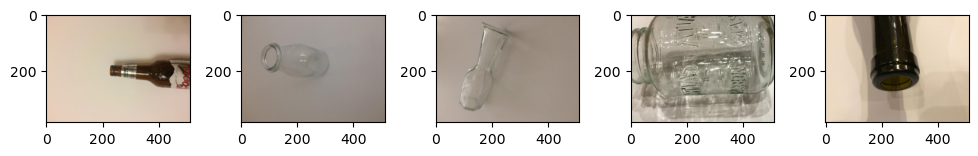

In [6]:
plot_imgs(datapath+'/glass')


/var/folders/sq/r22wpgjx4fl0jn162qxwjhq00000gn/T/ipykernel_4293/3433810448.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


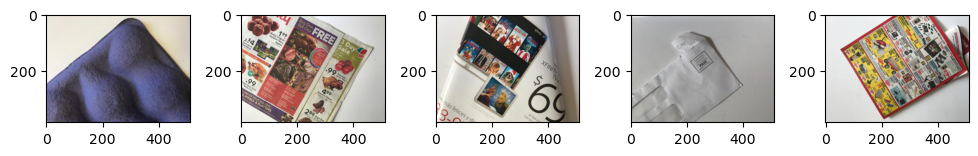

In [7]:
plot_imgs(datapath+'/paper')


/var/folders/sq/r22wpgjx4fl0jn162qxwjhq00000gn/T/ipykernel_4293/3433810448.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


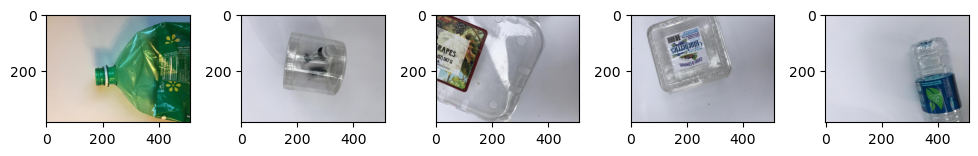

In [8]:
plot_imgs(datapath+'/plastic')


/var/folders/sq/r22wpgjx4fl0jn162qxwjhq00000gn/T/ipykernel_4293/3433810448.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


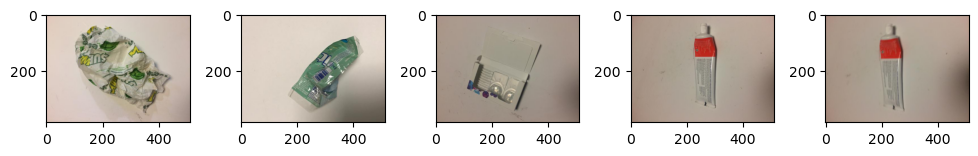

In [9]:
plot_imgs(datapath+'/trash')


#### Plot the distribution of the training data in each class

In [10]:
class_names = [d for d in os.listdir(datapath) if os.path.isdir(os.path.join(datapath, d))]

# Remove '.DS_Store' if present
if '.DS_Store' in class_names:
    class_names.remove('.DS_Store')

class_image_counts = {class_name: len(os.listdir(os.path.join(datapath, class_name)))
                      for class_name in class_names}

print("Number of images per class:", class_image_counts)


Number of images per class: {'paper': 594, 'metal': 410, 'cardboard': 403, 'trash': 137, 'glass': 501, 'plastic': 482}


Text(0, 0.5, 'Count')

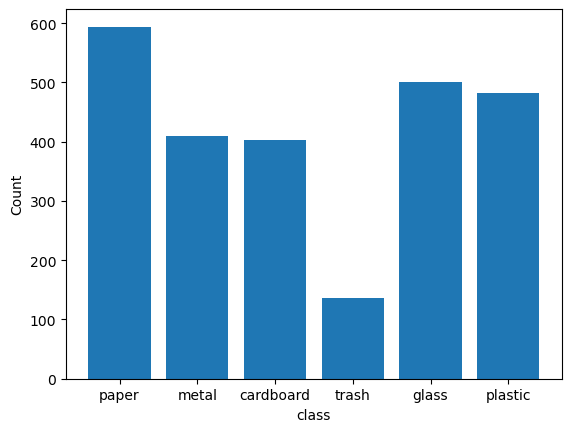

In [11]:
classes = list(class_image_counts.keys())
counts = list(class_image_counts.values())
plt.bar(classes, counts)
plt.xlabel('class')
plt.ylabel('Count')

### Creating Deep Learning models 

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, VGG19
from tensorflow.keras.models import Model

#### Splitting the Dataset into Train(60%), Validation(20%) and Test(20%) sets

In [13]:


# Set parameters
input_shape = (224, 224, 3)
batch_size = 32
epochs = 20

# Prepare the data with an additional split for testing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.4)  # 60% train, 40% validation + test
train_generator = datagen.flow_from_directory(
    'Garbage_recognition/Garbage classification/Garbage classification',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.5)  # 50% of 40% = 20% validation, 20% test
validation_generator = valid_datagen.flow_from_directory(
    'Garbage_recognition/Garbage classification/Garbage classification',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # This creates validation set from the validation+test split
)

test_generator = valid_datagen.flow_from_directory(
    'Garbage_recognition/Garbage classification/Garbage classification',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # This creates test set from the validation+test split
)





Found 1519 images belonging to 6 classes.
Found 1262 images belonging to 6 classes.
Found 1265 images belonging to 6 classes.


### CNN model

In [14]:
# Define and train the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

/Users/jennifer/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compiling and fitting the model 

In [15]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(train_generator, epochs=epochs, validation_data=validation_generator)
cnn_model.save('garbage_cnn_model.h5')


Epoch 1/20


/Users/jennifer/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 465ms/step - accuracy: 0.2667 - loss: 1.9091 - val_accuracy: 0.3447 - val_loss: 1.5714
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 22s 457ms/step - accuracy: 0.3985 - loss: 1.4401 - val_accuracy: 0.4017 - val_loss: 1.4819
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 22s 464ms/step - accuracy: 0.5286 - loss: 1.2282 - val_accuracy: 0.4802 - val_loss: 1.3424
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 469ms/step - accuracy: 0.5474 - loss: 1.1274 - val_accuracy: 0.5602 - val_loss: 1.2522
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 22s 460ms/step - accuracy: 0.6212 - loss: 1.0102 - val_accuracy: 0.5555 - val_loss: 1.2310
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 22s 451ms/step - accuracy: 0.6604 - loss: 0.9156 - val_accuracy: 0.5404 - val_loss: 1.2000
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 488ms/step - accuracy: 0.6943 - loss: 0.8447 - val_accuracy: 0.5864 - val_loss: 1.1367
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 465ms/step - accuracy: 0.7197 - loss: 0.7928 - val_accuracy: 0.551

#### Plotting Accuracy and Loss during the Epochs

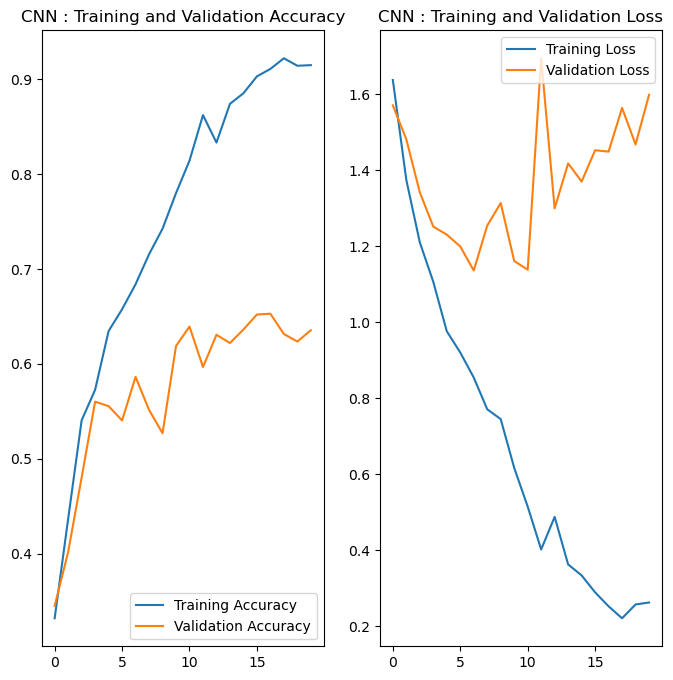

In [16]:
acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']

loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN : Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN : Training and Validation Loss')
plt.show()

The above graph shows that the training Loss is decreasing, but the validation loss is initially decreasing, but as epochs increases, the Loss increases, showing, that there is overfitting in this model.

## Pretrained Models from TensorFlow

### ResNet50

In [17]:
# Load ResNet50 model pre-trained on ImageNet
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)
model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions)

for layer in base_model_resnet.layers:
    layer.trainable = False
    
    



#### Compiling the ResNet50 model and saving the weights

In [18]:
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_resnet = model_resnet.fit(train_generator, epochs=epochs, validation_data=validation_generator)
model_resnet.save('garbage_resnet_model.h5')


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.1820 - loss: 1.9892 - val_accuracy: 0.3011 - val_loss: 1.6817
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.2623 - loss: 1.6896 - val_accuracy: 0.2821 - val_loss: 1.6569
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.2606 - loss: 1.6689 - val_accuracy: 0.2448 - val_loss: 1.6556
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.2640 - loss: 1.6718 - val_accuracy: 0.2940 - val_loss: 1.6319
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.2690 - loss: 1.6498 - val_accuracy: 0.2401 - val_loss: 1.6305
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.2692 - loss: 1.6506 - val_accuracy: 0.2805 - val_loss: 1.6190
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.2922 - loss: 1.6138 - val_accuracy: 0.2528 - val_loss: 1.6354
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.2959 - loss: 1.6316 - val_accuracy: 0.3273 - val_loss:

#### Plotting Accuracy and Loss

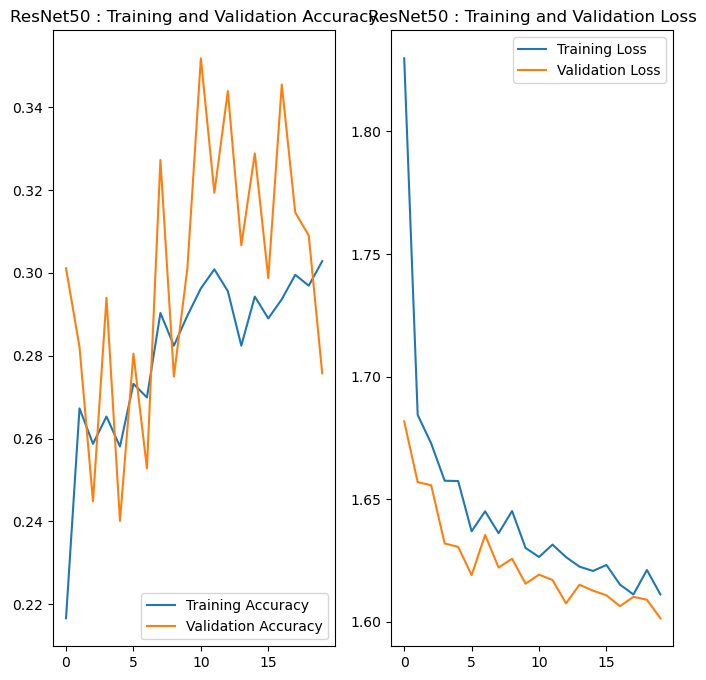

In [19]:
acc = history_resnet.history['accuracy']
val_acc = history_resnet.history['val_accuracy']

loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ResNet50 : Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('ResNet50 : Training and Validation Loss')
plt.show()

With the Resnet50 model, we can observe that as the epochs increases, the validation accuracy is getting better, and also the loss is decreasing. If we increase the number of epochs the Resnet model could learn better.

#### VGG19 Pretrained model

In [20]:
# Load VGG19 model pre-trained on ImageNet
base_model_vgg = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
x = base_model_vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)
model_vgg = Model(inputs=base_model_vgg.input, outputs=predictions)

for layer in base_model_vgg.layers:
    layer.trainable = False

    


#### Compiling and saving the weights

In [21]:
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg = model_vgg.fit(train_generator, epochs=epochs, validation_data=validation_generator)
model_vgg.save('garbage_vgg_model.h5')



Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 242s 5s/step - accuracy: 0.2183 - loss: 1.8812 - val_accuracy: 0.4239 - val_loss: 1.4931
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 243s 5s/step - accuracy: 0.4363 - loss: 1.4726 - val_accuracy: 0.5040 - val_loss: 1.3219
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 249s 5s/step - accuracy: 0.4547 - loss: 1.3273 - val_accuracy: 0.5119 - val_loss: 1.2311
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 250s 5s/step - accuracy: 0.5471 - loss: 1.2052 - val_accuracy: 0.5531 - val_loss: 1.1533
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - accuracy: 0.5867 - loss: 1.1151 - val_accuracy: 0.5642 - val_loss: 1.1373
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - accuracy: 0.5690 - loss: 1.0914 - val_accuracy: 0.5864 - val_loss: 1.0680
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - accuracy: 0.6265 - loss: 0.9948 - val_accuracy: 0.5880 - val_loss: 1.0600
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - accuracy: 0.6527 - loss: 0.9749 - val_accuracy: 0.6204 - v

#### Plotting Accuracy and Loss for Validation and Training set

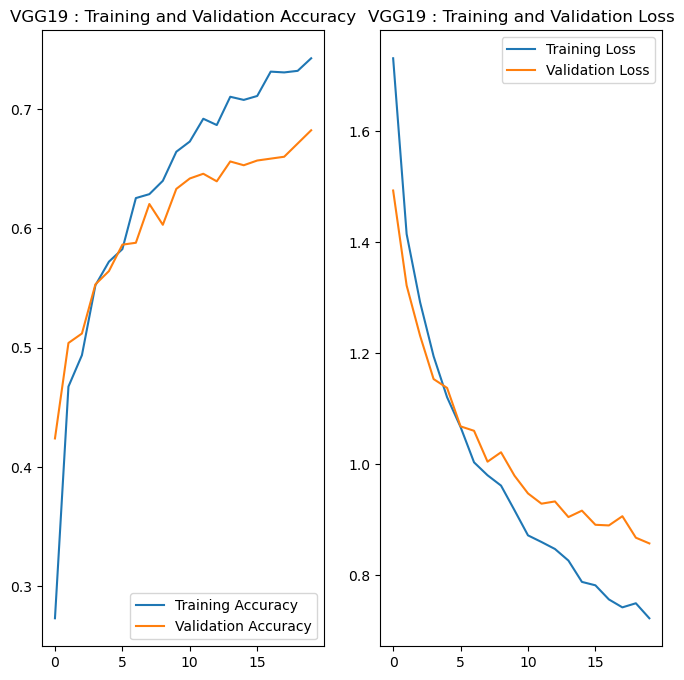

In [22]:
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']

loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('VGG19 : Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('VGG19 : Training and Validation Loss')
plt.show()

### Accuracy for unseen data(Test) for all the models

In [23]:

# Evaluate the models on the test set
cnn_loss, cnn_acc = cnn_model.evaluate(test_generator)
resnet_loss, resnet_acc = model_resnet.evaluate(test_generator)
vgg_loss, vgg_acc = model_vgg.evaluate(test_generator)

print(f"CNN Model Accuracy: {cnn_acc * 100:.2f}%")
print(f"ResNet50 Model Accuracy: {resnet_acc * 100:.2f}%")
print(f"VGG19 Model Accuracy: {vgg_acc * 100:.2f}%")

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9869 - loss: 0.0652
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 673ms/step - accuracy: 0.3135 - loss: 1.5975
40/40 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.7964 - loss: 0.6146
CNN Model Accuracy: 98.26%
ResNet50 Model Accuracy: 31.94%
VGG19 Model Accuracy: 79.60%


# Loading an image to predict its category

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


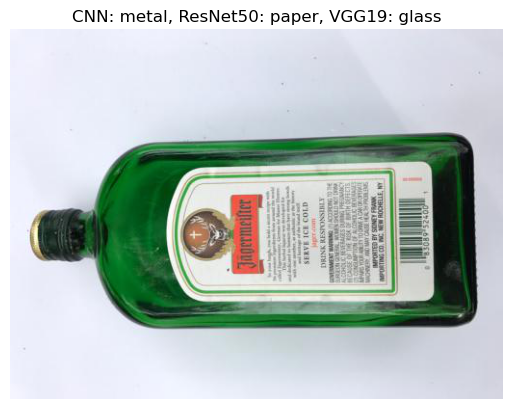

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt 

# Define the class names
class_names = list(train_generator.class_indices.keys())

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Function to make predictions and plot the image with predictions
def predict_and_plot(img_path):
    img_array = load_and_preprocess_image(img_path)

    # Make predictions
    cnn_pred = cnn_model.predict(img_array)
    resnet_pred = model_resnet.predict(img_array)
    vgg_pred = model_vgg.predict(img_array)

    # Decode predictions
    cnn_class = class_names[np.argmax(cnn_pred)]
    resnet_class = class_names[np.argmax(resnet_pred)]
    vgg_class = class_names[np.argmax(vgg_pred)]

    # Plot the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'CNN: {cnn_class}, ResNet50: {resnet_class}, VGG19: {vgg_class}')
    plt.show()

# Provide the path to an image and predict
img_path = 'Garbage_recognition/Garbage classification/Garbage classification/glass/glass100.jpg'
predict_and_plot(img_path)